In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Считаем данные в датафрейм и сделаем необходимые преобразования

In [125]:
df = pd.read_csv("production.csv", sep=';')
df.drop(labels=1463, inplace=True)
df.defects = pd.to_numeric(df.defects)

#### Сгруппируем данные по компаниям

In [126]:
df_grouped_by_supplier = df.groupby('supplier').sum()
print(df_grouped_by_supplier.head())

df_harpy = df[df['supplier'] == 'harpy.co']
df_westeros = df[df['supplier'] == 'westeros.inc']

              unsullen.id  production.date  report.date  produced  defects
supplier                                                                  
harpy.co          34425.0             3850         6650   31532.0   6080.0
westeros.inc     101870.0             3849         6644   31625.0   8269.0


#### Нарисуем график общего количества произведеннх мечей

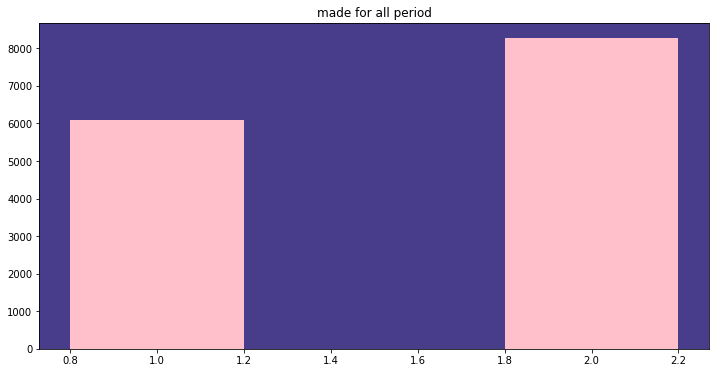

In [129]:
df_harpy_defects = df_harpy.defects.astype(float)

df_westeros_defects = df_westeros.defects.astype(float)

fig, ax = plt.subplots()

ax.bar([1, 2], [ df_harpy_defects.sum(), df_westeros_defects.sum()], color = 'pink', width = 0.4)
ax.set_facecolor('darkslateblue')
plt.title("made for all period")
fig.set_figwidth(12)    
fig.set_figheight(6) 
plt.show()

#### Теперь дополним его данными об общем количестве сломанных мечей

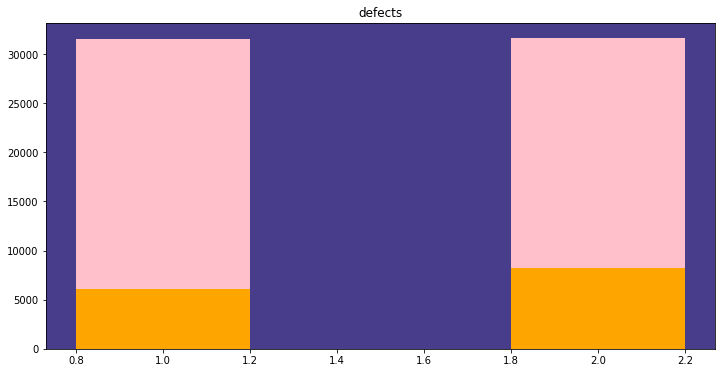

In [130]:
defects = df_grouped_by_supplier.iloc[0]['produced'], df_grouped_by_supplier.iloc[1]['produced']
fig, ax = plt.subplots()
ax.bar([1, 2], defects, color = 'pink', width = 0.4)
ax.bar([1, 2], [df_harpy_defects.sum(), df_westeros_defects.sum()], color = 'orange',width = 0.4)
plt.title("defects")
ax.set_facecolor('darkslateblue')
fig.set_figwidth(12)    
fig.set_figheight(6) 
plt.show()

#### Нарисуем графики сумарного количества мечей с дефектами

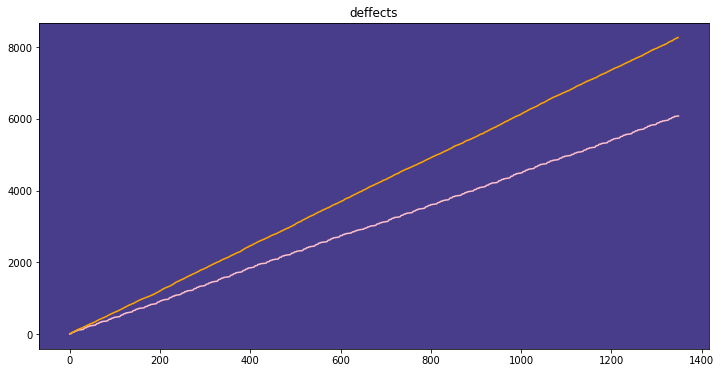

In [101]:
from itertools import accumulate


fig, ax = plt.subplots()
ax.plot(list(accumulate(df_harpy_defects)), color='pink')
ax.plot(list(accumulate(df_westeros_defects)), color='orange')
plt.title("deffects")
ax.set_facecolor('darkslateblue')
fig.set_figwidth(12)    
fig.set_figheight(6) 
plt.show()

#### Рассмотрим графики сделанных и сломанных мечей за каждый месяц

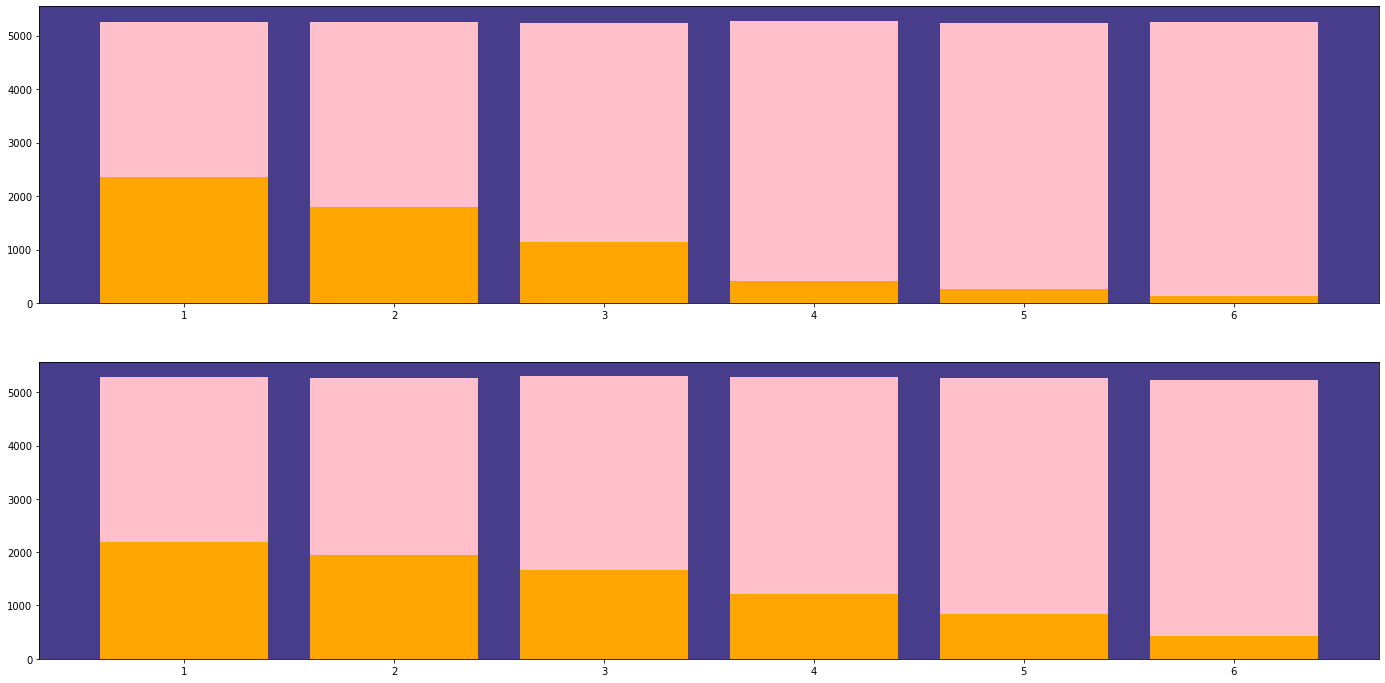

In [138]:
df_harpy.head()
df_harpy.groupby('production.date').sum()
fig, ax = plt.subplots(2)
ax[0].bar([1, 2, 3, 4, 5, 6], df_harpy.groupby('production.date').sum().produced, color='pink')
ax[0].bar([1, 2, 3, 4, 5, 6], df_harpy.groupby('production.date').sum().defects, color='orange')
ax[1].bar([1, 2, 3, 4, 5, 6], df_westeros.groupby('production.date').sum().produced, color='pink')
ax[1].bar([1, 2, 3, 4, 5, 6], df_westeros.groupby('production.date').sum().defects, color='orange')

ax[0].set_facecolor('darkslateblue')
ax[1].set_facecolor('darkslateblue')
fig.set_figwidth(24)    
fig.set_figheight(12) 
plt.show()